In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001115055"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001115055
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,PINNACLE FINANCIAL PARTNERS INC
Ticker,PNFP


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
interest income,55.0,7.467231e+07,6.422084e+07,102143.0,46666720.50,50564404.0,72494319.50,257883000.0
net income,54.0,1.818854e+07,2.560426e+07,-31775751.0,5366546.75,10894384.5,25612937.25,95318000.0
net interest income,55.0,5.887623e+07,5.189288e+07,88767.0,29586824.50,40185063.0,66766925.50,190215000.0
provision for loan losses,55.0,5.849822e+06,9.895259e+06,3651.0,1042819.50,3046204.0,6433769.00,65320390.0


# Plots

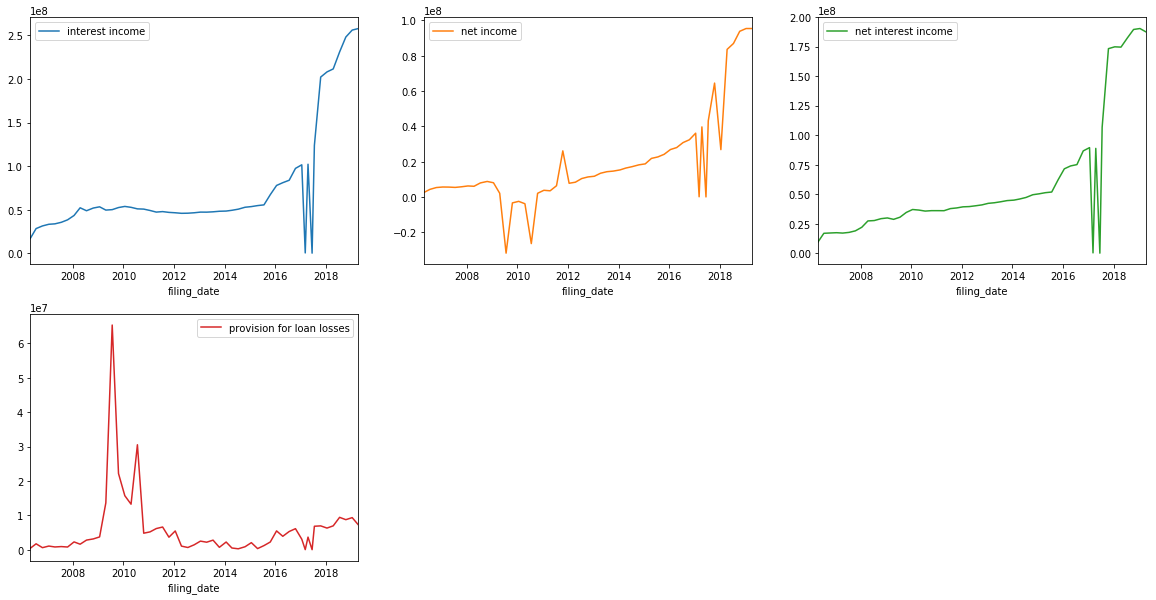

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0001115055 book value per share                              None      empty   
           interest income            2016Q4 to 2017Q1: 2 periods  duplicate   
           net income                 2016Q4 to 2017Q1: 2 periods  duplicate   
           net income                                      2019Q1    missing   
           net interest income        2016Q4 to 2017Q1: 2 periods  duplicate   
           provision for loan losses  2016Q4 to 2017Q1: 2 periods  duplicate   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0001115055 book value per share       No values for item  
           interest income              Duplicate period  
           net income                   Duplicate period  
           net income                     Missing period  
           net interest income          Duplicate period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()